# Test Set

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.externals import joblib
from my_measures import BinaryClassificationPerformance
%matplotlib inline
from tqdm import tqdm

### Read raw test data

In [2]:
amazon = pd.read_csv('/Users/working/Documents/ParsonsSchool/Sp19/MachineLearning/DATASET/amazon_data/raw_data_test.csv')

print(amazon.shape)

(91000, 14)


In [3]:
print(amazon.loc[0, "Text"])

strong taste but good! In my opinion it's not exactly a substitute for coffee but tastes really good mixed together.


In [4]:
print(amazon.head())
print(amazon['helpful'].mean())

   Unnamed: 0  Unnamed: 0.1      Id   ProductId          UserId  \
0      207103        112082  112083  B002Y2QT2K  A22Y5TJPN98DWB   
1      139933        224640  224641  B009D53XKC  A3MDY6Y3Z6D649   
2       76100        399707  399708  B005GIF5WY  A3LCQXQ4SFYBAU   
3      114178        567900  567901  B005K4Q68Q  A2E65ZXD654761   
4      285272        263134  263135  B002WW3BW8  A1XAZ0MR4TRY16   

                  ProfileName  HelpfulnessNumerator  HelpfulnessDenominator  \
0                Eva Juergens                     1                       1   
1  The Man Behind the Curtain                     1                       1   
2                  Johna Jane                     0                       0   
3                   Barbara L                     0                       0   
4                        bfn1                     0                       0   

   Score        Time                          Summary  \
0      3  1339286400                 chicory "coffee"   
1      5

In [5]:
##study chat

print(amazon[(amazon.helpful == True) &  (amazon.HelpfulnessNumerator>=5)] )

       Unnamed: 0  Unnamed: 0.1      Id   ProductId          UserId  \
7           74160        306680  306681  B000KNB0OW  A1UQBFCERIP7VJ   
14         235629        224160  224161  B0002ARQYQ  A2T90OFSZ5QVE8   
19         261341        100841  100842  B000O3EDA6  A1VPUK22B4MTDE   
20         218022        107544  107545  B007TJGY4Q  A153ZN281OATI6   
28         348320        246292  246293  B0009F3SB4  A23C3X5UGN7KMN   
43         398064        506166  506167  B001CWVZUY  A1UKN7G4AM275R   
57         268338        352657  352658  B000U3H4PQ   AYB4ELCS5AM8P   
64          14378        464995  464996  B002EDIJCM  A191T1D7JURDMI   
83         306766        551822  551823  B003RDFJ6C  A3NID9D9WMIV01   
148        159725         45277   45278  B000OV5NBG  A3OQGS2G48ZURR   
175         34171        417148  417149  B00112ILZM  A3FNMPXHHIVEYT   
181         24886        447330  447331  B000GZU900  A1WXJ1I42UOQ2V   
191        183906        394423  394424  B00269VK20  A154PTQXC5FFKH   
202   

In [6]:
# from gensim.parsing.preprocessing import remove_stopwords
# # remove stop words in amazon.Text
# amazon['Text'] = amazon['Text'].apply(remove_stopwords)
# #newText = amazon['Text'].apply(remove_stopwords)
# print(amazon.Text)

In [7]:
#Lemmatization 
from gensim.utils import lemmatize
print('**************************************************')
amaLemma=[]
for w in tqdm(amazon['Text']):
    amaLemma.append([wd.decode('utf-8').split('/')[0] for wd in lemmatize(w)])

  0%|          | 0/91000 [00:00<?, ?it/s]

**************************************************


100%|██████████| 91000/91000 [13:13<00:00, 114.67it/s]


In [9]:
amaNp=np.array(amaLemma)
amaDF=pd.DataFrame(amaNp)

amaDF.to_csv('/Users/working/Documents/ParsonsSchool/Sp19/MachineLearning/DATASET/amazon_data/AmazonLemmatizedTestingwithStopWords.csv')
print(amaDF)

                                                       0
0      [strong, taste, good, opinion, not, exactly, s...
1      [search, high, low, salt, change, life, end, j...
2      [treat, be, picky, cat, favorite, ve, try, dif...
3      [price, be, fantastic, taste, so, convenient, ...
4      [alot, chocolate, not, so, much, coffee, bean,...
5      [look, ingredient, water, wheat, salt, sugar, ...
6      [love, love, bread, mix, person, be, raise, ea...
7      [country, choice, brand, be, domestically, pro...
8      [taste, good, easy, prepare, separate, pouch, ...
9      [only, recently, have, discover, satisy, inter...
10     [always, enjoy, tazo, tea, earl, grey, be, fav...
11     [be, skeptical, sister, tell, drug, rep, have,...
12     [have, grand, kid, fall, play, ground, equipme...
13     [guess, get, title, wrong, be, food, left, be,...
14     [buy, mini, buster, cube, miniature, dachshund...
15     [ll, confess, know, little, different, coffee,...
16     [be, thrill, find, flavo

In [10]:
#JOIN LIST TO STR


amaDFOut = amaDF[0].apply(' '.join)
print(amaDFOut.head())
# amaDFOut= amaNp


0    strong taste good opinion not exactly substitu...
1    search high low salt change life end journey m...
2    treat be picky cat favorite ve try different b...
3    price be fantastic taste so convenient make me...
4    alot chocolate not so much coffee bean not big...
Name: 0, dtype: object


### Feature extraction on natural language data

In [11]:
# # http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html
# from sklearn.feature_extraction.text import CountVectorizer
# vectorizer = CountVectorizer()
# corpus = amazon.Text.as_matrix()
# X_bag_of_words = vectorizer.fit_transform(corpus)
# print(X_bag_of_words.toarray())
hv = joblib.load('vectorizer.pkl')
X_hv = hv.transform(amaDFOut)
print(X_hv.shape)

(91000, 76362)


In [12]:
# # vectorize Bag of Words from review text; as sparse matrix
# # from sklearn.feature_extraction.text import HashingVectorizer
# # hv = HashingVectorizer(n_features=2 ** 17, non_negative=True)
# hv = joblib.load('hv.pkl')
# #X_hv = hv.transform(amazon.Text)
# X_hv = hv.transform(amaDFOut)
# print(X_hv.shape)
# # print(hv.shape)

In [13]:
# http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfTransformer.html
# from sklearn.feature_extraction.text import TfidfTransformer
# transformer = TfidfTransformer()
transformer = joblib.load('transformer.pkl')
X_tfidf = transformer.transform(X_hv)

In [14]:
print(type(X_tfidf))

<class 'scipy.sparse.csr.csr_matrix'>


### Time Converting 

In [15]:
import datetime

amazon['amaRead'] = amazon['Time'].apply(datetime.datetime.fromtimestamp)
amazon['amaMonth'] = amazon['amaRead'].apply(datetime.datetime.strftime, format=("%m"))
amazon['amaMonth'] = amazon['amaMonth'].apply(int)
amazon['amaDay'] =amazon['amaRead'].apply(datetime.datetime.weekday)

amazon['amaYear']=amazon['amaRead'].apply(datetime.datetime.strftime, format=("%Y"))
amazon['amaYear']= amazon['amaYear'].apply(int)


print(amazon['amaYear'].head(10))
print(amazon['amaMonth'].head(10))
print(amazon['amaDay'].head(10))

0    2012
1    2012
2    2012
3    2012
4    2011
5    2012
6    2011
7    2010
8    2010
9    2008
Name: amaYear, dtype: int64
0     6
1     1
2     8
3    10
4     7
5    10
6     3
7     2
8    10
9     2
Name: amaMonth, dtype: int64
0    5
1    1
2    6
3    1
4    6
5    2
6    0
7    4
8    0
9    6
Name: amaDay, dtype: int64


### Create additional quantitative features

In [16]:
# features from Amazon.csv to add to feature set
amazon['reviewLen'] = amazon['Text'].str.len()
amazon['reviewLenAfterLe'] = amaDFOut.str.len()
# X_quant_features = amazon[["Score", "reviewLen"]]
# X_quant_features = amazon[["Score", "reviewLen","amaDay","amaHour"]]
amazon['revPlusScore']=  amazon['reviewLen']*amazon['Score']
amazon['revLenMinLe']=amazon['reviewLen']-amazon['reviewLenAfterLe']

X_quant_features = amazon[["reviewLen","Score","reviewLenAfterLe","amaDay", "amaMonth", "revPlusScore", "amaYear","revLenMinLe"]]

print(X_quant_features.head(10))
print(type(X_quant_features))

   reviewLen  Score  reviewLenAfterLe  amaDay  amaMonth  revPlusScore  \
0        116      3                88       5         6           348   
1       2915      5              1911       1         1         14575   
2        152      5                97       6         8           760   
3        167      5               109       1        10           835   
4        120      3                90       6         7           360   
5        193      1               133       2        10           193   
6        732      5               428       0         3          3660   
7       1122      5               792       4         2          5610   
8         88      5                59       0        10           440   
9        549      5               390       6         2          2745   

   amaYear  revLenMinLe  
0     2012           28  
1     2012         1004  
2     2012           55  
3     2012           58  
4     2011           30  
5     2012           60  
6     2011    

### Combine all quantitative features into a single sparse matrix

In [17]:
from scipy.sparse import csr_matrix, hstack
X_quant_features_csr = csr_matrix(X_quant_features)
X_combined = hstack([X_tfidf, X_quant_features_csr])
X_matrix = csr_matrix(X_combined) # convert to sparse matrix
print(X_matrix.shape)

(91000, 76370)


### Create `X`, scaled matrix of features

In [18]:
# feature scaling
# from sklearn.preprocessing import StandardScaler
# sc = StandardScaler(with_mean=False)
sc = joblib.load('sc.pkl')
X = sc.transform(X_matrix)
# X = sc.transform(sc)
print(X.shape)
print(X_matrix.shape)

(91000, 76370)
(91000, 76370)


### create `y`, vector of Labels

In [196]:
# amazon['myhelpful']=np.where((amazon['HelpfulnessDenominator'] > 2) & (amazon['helpScore'] >= 0.4),True, False)
# amazon['myhelpful']=np.where((amazon['HelpfulnessDenominator'] >= 1) & (amazon['helpScore'] >= 0.4),True, False)
amazon['myhelpful']=np.where((amazon['HelpfulnessDenominator'] >=1),True, False)

In [197]:
# y = amazon['helpful'].values
y = amazon['myhelpful'].values
print(type(y))

<class 'numpy.ndarray'>


### predict `y` with the fit on the training set

In [198]:
# MODEL: ordinary least squares
# from sklearn import linear_model
# ols = linear_model.SGDClassifier(loss="squared_loss")
# ols.fit(X, y)
# joblib.dump(ols, 'ols.pkl') # pickle
ols = joblib.load('ols.pkl') # pickle

ols_performance = BinaryClassificationPerformance(ols.predict(X), y, 'ols')
ols_performance.compute_measures()
print(ols_performance.performance_measures)

{'Pos': 47475, 'Neg': 43525, 'TP': 46822, 'TN': 481, 'FP': 43044, 'FN': 653, 'Accuracy': 0.5198131868131868, 'Precision': 0.5210201856096855, 'Recall': 0.986245392311743, 'desc': 'ols'}


In [199]:
# MODEL: SVM, linear
# from sklearn import linear_model
# svm = linear_model.SGDClassifier()
# svm.fit(X, y)
# joblib.dump(svm, 'svm.pkl') # pickle
svm = joblib.load('svm.pkl') # pickle

svm_performance = BinaryClassificationPerformance(svm.predict(X), y, 'svm')
svm_performance.compute_measures()
print(svm_performance.performance_measures)

{'Pos': 47475, 'Neg': 43525, 'TP': 35821, 'TN': 22394, 'FP': 21131, 'FN': 11654, 'Accuracy': 0.6397252747252747, 'Precision': 0.628968253968254, 'Recall': 0.7545234333859926, 'desc': 'svm'}


In [200]:
# MODEL: logistic regression
# from sklearn import linear_model
# lgs = linear_model.SGDClassifier(loss='log', n_iter=50, alpha=0.00001)
# lgs.fit(X, y)
# joblib.dump(lgs, 'lgs.pkl') # pickle
lgs = joblib.load('lgs.pkl')

lgs_performance = BinaryClassificationPerformance(lgs.predict(X), y, 'lgs')
lgs_performance.compute_measures()
print(lgs_performance.performance_measures)

{'Pos': 47475, 'Neg': 43525, 'TP': 44878, 'TN': 7347, 'FP': 36178, 'FN': 2597, 'Accuracy': 0.5739010989010989, 'Precision': 0.5536666008685354, 'Recall': 0.9452975250131648, 'desc': 'lgs'}


In [201]:
# MODEL: Naive Bayes
# from sklearn.naive_bayes import MultinomialNB
# nbs = MultinomialNB()
# nbs.fit(X, y)
# joblib.dump(nbs, 'nbs.pkl') # pickle
nbs = joblib.load('nbs.pkl')

nbs_performance = BinaryClassificationPerformance(nbs.predict(X), y, 'nbs')
nbs_performance.compute_measures()
print(nbs_performance.performance_measures)

{'Pos': 47475, 'Neg': 43525, 'TP': 17367, 'TN': 36616, 'FP': 6909, 'FN': 30108, 'Accuracy': 0.5932197802197802, 'Precision': 0.7153979238754326, 'Recall': 0.3658135860979463, 'desc': 'nbs'}


In [202]:
# MODEL: Perceptron
# from sklearn import linear_model
# prc = linear_model.SGDClassifier(loss='perceptron')
# prc.fit(X, y)
# joblib.dump(prc, 'prc.pkl') # pickle
prc = joblib.load('prc.pkl')

prc_performance = BinaryClassificationPerformance(prc.predict(X), y, 'prc')
prc_performance.compute_measures()
print(prc_performance.performance_measures)

{'Pos': 47475, 'Neg': 43525, 'TP': 46929, 'TN': 2306, 'FP': 41219, 'FN': 546, 'Accuracy': 0.541043956043956, 'Precision': 0.5323887098969914, 'Recall': 0.9884992101105845, 'desc': 'prc'}


In [203]:
# MODEL: Ridge Regression Classifier
# from sklearn import linear_model
# rdg = linear_model.RidgeClassifier()
# rdg.fit(X, y)
# joblib.dump(rdg, 'rdg.pkl') # pickle
rdg = joblib.load('rdg.pkl')

rdg_performance = BinaryClassificationPerformance(rdg.predict(X), y, 'rdg')
rdg_performance.compute_measures()
print(rdg_performance.performance_measures)

{'Pos': 47475, 'Neg': 43525, 'TP': 28831, 'TN': 29966, 'FP': 13559, 'FN': 18644, 'Accuracy': 0.6461208791208791, 'Precision': 0.680136824722812, 'Recall': 0.6072880463401791, 'desc': 'rdg'}


In [211]:
# MODEL: Decision Tree Classifier
# from sklearn import tree
# dtc = tree.DecisionTreeClassifier(max_depth=100)
# dtc.fit(X_matrix, y)
# joblib.dump(dtc, 'dtc.pkl') # pickle
dtc = joblib.load('dtc.pkl')

dtc_performance = BinaryClassificationPerformance(dtc.predict(X_matrix), y, 'dtc')
dtc_performance.compute_measures()
print(dtc_performance.performance_measures)

{'Pos': 47475, 'Neg': 43525, 'TP': 36246, 'TN': 32056, 'FP': 11469, 'FN': 11229, 'Accuracy': 0.7505714285714286, 'Precision': 0.7596353348003773, 'Recall': 0.76347551342812, 'desc': 'dtc'}


In [205]:
# MODEL: Randomforest

# rfc = joblib.load('/Users/working/Documents/ParsonsSchool/Sp19/MachineLearning/DATASET/rfc.pkl')
# rfc_performance = BinaryClassificationPerformance(rfc.predict(X_matrix), y, 'rfc')
# rfc_performance.compute_measures()
# print(rfc_performance.performance_measures)

### ROC plot to compare performance of various models and fits

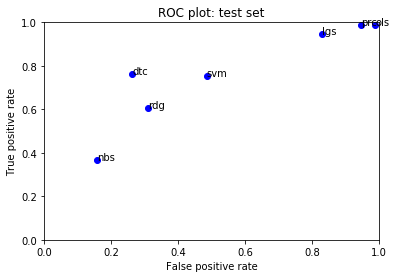

In [210]:
fits = [svm_performance, lgs_performance, nbs_performance, rdg_performance, prc_performance, ols_performance, dtc_performance]#rfc_performance

for fit in fits:
    plt.plot(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], 'bo')
    plt.text(fit.performance_measures['FP'] / fit.performance_measures['Neg'], 
             fit.performance_measures['TP'] / fit.performance_measures['Pos'], fit.desc)
plt.axis([0, 1, 0, 1])
plt.title('ROC plot: test set')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.show()

### looking at reviews based on their classification

Let's say we decide that Ridge Regression is the best model for generalization. Let's take a look at some of the reviews and try to make a (subjective) determination of whether it's generalizing well. 

In [99]:
amazon.loc[0, "Text"]

"strong taste but good! In my opinion it's not exactly a substitute for coffee but tastes really good mixed together."

In [100]:
amazon.loc[0, "helpful"]

False

In [101]:
ridge_predictions = rdg.predict(X)

In [102]:
ridge_predictions.shape

(91000,)

In [103]:
print(ridge_predictions)

[False  True False ... False False False]


In [104]:
# false positives

import random, time

for i in range(0, len(ridge_predictions)):
    if (ridge_predictions[i] == True):
        if (amazon.loc[i, "helpful"] == False):
            if (random.uniform(0, 1) < 0.05):
                print(i)
                print(time.strftime('%Y-%m-%d %H:%M:%S', time.gmtime(amazon.loc[i, "Time"])))
                print(amazon.loc[i, "Score"])
                print(amazon.loc[i, "HelpfulnessDenominator"])
                print(amazon.loc[i, "ProductId"])
                print(amazon.loc[i, "Text"])
                print('* * * * * * * * * ')

41
2012-07-09 00:00:00
1
4
B00474HER2
The labeling on this product is deceptive, I recently purchased this item in the store thinking when it says Pennsylvania Dutch and Americas Favorite Mushroom I was buying food produced in the US only to get it home and find it was a product of China.  How sad that a company would try to do this.
* * * * * * * * * 
71
2010-06-15 00:00:00
5
1
B000ESJR20
I've been drinking this coffee for many years.  It's the only instant coffee I've ever found palatable.  I live alone and usually only have one cup a day so it's great not to have to make a pot!
* * * * * * * * * 
87
2010-06-01 00:00:00
5
3
B002WDCAJ2
Love the Tassimo and love the Starbucks, especially the Verona!  When "brewed" it's fresh, bold, and rich!  I've wanted a pod-style coffee maker for a long time but just wasn't fully satisfied with the Keurig and others.  Don't get me wrong, they're good, just not as good as the price.  I lucked out and bought a Tassimo on clearance which introduced me 

B002R48MDE
If you like chocolate a lot - you'll love these truffles!!  They melt in your mouth and leave you wanting more.  Expensive but so worth it!
* * * * * * * * * 
7771
2012-05-03 00:00:00
5
0
B005EL6VOY
i love this stuff! im 15 yrs old and i like to eat organic/healthy/non-processed foods and this stuff definitely gets the job done. its a very healthy way to start off the morning and its only cost 14 bucks!
* * * * * * * * * 
7814
2009-11-07 00:00:00
3
0
B000PJMRWU
These are made with mostly air and egg white and have a fantastic nutritional profile for bodybuilders and people losing weight or maintaining a weight loss.  I've lost 160 lbs through diet and exercise and like the reviewer who had surgery, I don't want to eat the amount of sugar found in normal meringues.  The fact there's a reasonable amount of protein in there is a bonus.<br /><br />With the holidays coming up I appreciate having a treat to bring to parties and dinners that I can both share AND eat, while staying 

2009-11-04 00:00:00
5
8
B001EQ4RWQ
Erythritol is the only intestine-friendly sugar alcohol and has the most sweetness per caloric content of any sugar alcohol. Sucralose, on the other hand, is also in this product and is made by manipulating sugar molecules with chlorine.. yuck.<br /><br />Regardless, I prefer this ingredient list to other chocolate syrups.<br /><br />Ingredients: water, erythritol, glycerin, cocoa, natural flavors, citric acid, xanthan gum, salt, potassium sorbate, sodium benzoate, caramel color, acesulfame potassium, sucralose, vanillin, artificial flavor, zinc sulfate vitamin e acetate, niacinamide and biotin.<br /><br />There is a bitter aftertaste, but it's sugar free for a reason and I'm sure anyone interested in this product will get used to it.
* * * * * * * * * 
15673
2008-12-15 00:00:00
5
1
B0019FEOJI
I am always looking for something to send to my sons (one is in college the other in the military). I sent these cookies along with some other LUs to my college

B000EVG8H4
I literally just made my first loaf of gluten free bread mix with this product and I am truly amazed how good it is! It reminds me of the bread my Mom used to make, fresh out of the oven with all the good smells. I put butter and honey on the first slice and went right back to my childhood. Thank you Gluten Free Pantry!I have to say I have a plain Jane, single paddle breadmaker, nothing fancy so I was skeptical that my breadmaker would produce the best bread. I used the "Rapid" option and it came out just fine. The color and texture were perfect, it did not fall apart or have a strange flavor (as other bread reviews I read) and it could be sliced immediately (serrated knives work best). I will definitely buy more of this bread mix. I would like to recommend that they package this product for 1 1/2 lb loafs as well (my breadmaker only goes to 1 1/2 lbs) or in bulk bags for more economy.
* * * * * * * * * 
23267
2009-08-11 00:00:00
1
7
B0007ZLRVO
I don't get all the hype over 

32041
2012-06-01 00:00:00
5
2
B002HAVPLO
In the spring and summer this grass grows with no problem and no sun. It is an absolute miracle to watch. I plant this grass in a plastic planter box and water it just a bit to get the grass started. After a few days it sprouts and then within a few more days it grows three or more inches. Eventually it grows to about six inches and then starts to wilt. Of course by then the cats have had a feeding frenzy and the grass is all torn up and ready to be pulled up. One bag of seeds lasts me through the summer and I plant new seeds about every two to three weeks. So far I've never had problems with this company's seeds but if you are nervous buy some first from a pet store. One thing I do that might be the reason I have success with these seeds is I spread them out on the soil and then barely cover them with a thin layer of soil. I also water them about twice before they sprout. I just think it is amazing that this grass grows without any direct sunli

40684
2011-12-20 00:00:00
5
0
B004AGA0LE
Chestnuts and products are hard to find in Southern California and they are as much a part of my Christmas season as the tree. Have tried this type of product before in Europe and loved it. This is my first try of this brand and it was delectable. Smooth. Rich. Divine. Better than a fine Gentleman.
* * * * * * * * * 
40734
2010-12-06 00:00:00
1
3
B001HTKP6C
Bob's Red Mill sells a few varieties of oatmeal, and the one listed (quick-cooking) is not the one pictured, described, or sold (instant). Indeed, Bob's Red Mill Quick Cooking Rolled Oats is not the same as Bob's Red Mill Instant Rolled Oats. This listing sells the Instant Rolled Oats, yet is titled as Quick Cooking. Some people feel that the Quick Cooking Oats is tastier than Instant, and when they place an order for the former, they don't want to receive the latter. I am deliberately giving this listing a low rating to draw your attention, in case this makes a big difference for you.<br /><

49355
2012-01-07 00:00:00
5
1
B0049YK1W0
I have made multiple loaves of bread so far with this whole wheat bread flour.  I still have a lot of flour left to use, but I'm sure it will go quickly.  It is good to know that I am eating whole wheat when I make bread with this flour!
* * * * * * * * * 
49368
2008-01-12 00:00:00
5
7
B00073JVFU
This was a gift for mom who had run out.  She swears by it for calming her stomach, says it still works.
* * * * * * * * * 
49395
2008-05-12 00:00:00
5
1
B0009F3PQ2
This is perhaps the most flavorful and refreshing tea I have had before calling it a night.  The directions call for a  10-15 min soaking time and it truly does make a difference for the richness of the tea.  The product is appropriately named "Throat Coat" as I have always found it a soothing experience whenever my throat is dry or irritating.
* * * * * * * * * 
49407
2012-09-26 00:00:00
3
0
B008UK8KQ8
This is the other half of the order with the other half consisting of contaminated spaghe

The product was stale and rubbery like. They were flavorless as well.<br /><br />I would not recommend this specific product to anyone.
* * * * * * * * * 
57354
2012-02-17 00:00:00
3
1
B003561V40
Good products<br />Love Diet Energy 5/5 and Diet Root Beer 5/5<br /><br />a couple stinkers -<br />Diet Fountain Mist (Mountain Dew-like, tart fake flavor) 1/5<br />Diet Dr. Pete (Weak flavor, not bold like Dr. Pepper) 3/5<br /><br />Amazon - Do better on price! This is 5.99 to 6.99 in the stores (you are charging double)<br />Sodastream - Reformulate these two!
* * * * * * * * * 
57384
2009-01-07 00:00:00
1
6
B0019SP8UO
Tried it, retried it, wife tried it, conclusion: insipid.  The only barely acceptable way to prepare it, in my opinion, is to run two pods at single-pod followed by a single-pod Sumatra.  Godiva is highly overrated and with absolutely NO returns, we're stuck with two more undesirable packs.<br /><br />Avoid if you like coffee and avoid if you like chocolate.  This ain't no moc

2012-09-18 00:00:00
1
2
B0083T6HC0
k-cups were loose in a paper bag and this item was intended and marked as a gift.  the package was also a few k-cups short.  THE PRICE DROPPED 40% AFTER I PURCHASED.  DID NOT RETURN BECAUSE I NEEDED A GIFT BUT NEEDED TO BUY SOMETHING MORE SO THAT I WAS NOT EMBARRASSED!<br />VERY DISSAPOINTED!
* * * * * * * * * 
65993
2012-08-21 00:00:00
5
0
B000MGR2IU
This product was introduced to me by a friend that bought a differnet name brand. I tried her product and found it was instint and great results. I ordered this brand because it had the same ingriedents at a lower price. Works just as good as the other brand, no other allegery product has ever worked for my allegries. Once you take this you'll never go back to any other allegry product on the market. GREAT PRODUCT!!!
* * * * * * * * * 
66003
2010-04-22 00:00:00
4
2
B008FHUCNU
Agree with other reviewers - if you find other k-cups lacking the strength of flavor and boldness of coffee-house coffee, but fren

2012-01-26 00:00:00
5
0
B006N3I7JO
Tastes great and an ideal placebo for those of us who cannot have caffeine.  Wish they had them in 48/96 cup sets with a lower price point.
* * * * * * * * * 
74441
2012-04-11 00:00:00
4
0
B005K4Q4LK
Don't get me wrong, this is a good coffee. Only reason for the 4 stars; I am partial to the Hazelnut Cappuccino. We all have different tastes, you may love it, so I recommend you try it. Good pricing, worth a try. Remember, it you don't like it, I believe you can return it.
* * * * * * * * * 
74476
2010-09-20 00:00:00
2
0
B0012NUVN0
Neat concept...but disappointing results.  Our dog figured this toy out very quickly.  I agree with the other poster, it is hard to load the treats, so I do not know how a dog can get them out so quickly.  The fun only lasted for at most 2 minutes.  She still plays with the blue part of the toy every now and then, just with no treats.
* * * * * * * * * 
74486
2009-08-30 00:00:00
3
1
B000ILILM0
I first purchased these cookies a

81887
2009-11-15 00:00:00
5
1
B002AY5BHG
My dog loves his ZP. He's primarily a ZP venison kind of guy due to allergies, but with trying to introduce new protein sources to him I've turned to the other varieties of ZP including the Venison and Fish and Lamb. Both were gobbled down without hesitation. Clearly he doesn't know that the food is good for him, or I suspect that he would be requiring it to be doused with canned food! But that is the wonderful thing about ZP - it is super high quality with no grains or fillers AND dogs love it. And my boy Titan looks better than he ever has; he's always been a strong dog, but on ZP he looks like he lifts weights. He's been on an exclusive ZP diet for about 4 or 5 months and his coat is shiny and velvety like a champion racehorse.<br /><br />Something to attest to the supreme flavor of this food: recently I was running low on ZP and so I had to supplement with some raw venison. I put down a bowl of raw venison for him while I was rationing out t

2009-07-14 00:00:00
4
0
B000V7SUPY
I used to buy <a href="http://www.amazon.com/gp/product/B000EMQFF8">Fruit by the Foot</a> or <a href="http://www.amazon.com/gp/product/B000EMOCPI">Fruit Roll-Ups</a>, but being both high in sugar and expensive I wanted to find an alternative. After trying several fruit snacks out there we settled on <a href="http://www.amazon.com/gp/product/B000V7SUPY">Florida's Natural Au'some Fruit Juice Stiks, 68% Fruit Content</a>. The sugar content is still not the best, but definitely better than what we had been buying. Also the price per piece went from as much as .36¢ each to just .13¢ each when purchased through Subscribe & Save. My kids really enjoy them and I do too.
* * * * * * * * * 
89361
2011-04-20 00:00:00
5
0
B005XH6SD8
Jarrow puts out one of the best line of nutritional products I have ever used. I know, since I have been taking many vitamins and herbs for about 20 years. And their totally natural whey protein powder is no exception. It also comes i

In [125]:
rfc_predictions = rfc.predict(X)

In [136]:
# false positives

# import random, time

for i in range(0, len(rfc_predictions)):
    if (rfc_predictions[i] == True):
        if (amazon.loc[i, "helpful"] == False):
            if (random.uniform(0, 1) < 0.05):
                print(i)
                print(time.strftime('%Y-%m-%d %H:%M:%S', time.gmtime(amazon.loc[i, "Time"])))
                print(amazon.loc[i, "Score"])
                print(amazon.loc[i, "HelpfulnessDenominator"])
                print(amazon.loc[i, "ProductId"])
                print(amazon.loc[i, "Text"])
                print('* * * * * * * * * ')

23667
2010-07-04 00:00:00
5
3
B000WFORH0
The pet food industry can be one of the most infuriating as you start doing research and discovering what trash manufacturers (and the vets who get paid off by the manufacturers) push onto the unsuspecting public. For reference, don't ask your vet - do some Internet research at sites like, for example, [...]. What you'll find is that even the supposed "high-end" lines from basically every major supermarket label are horrible for your fuzzy friends. People who trust the marketing or trust their vets overpay and feed their cats foods that are full of carcinogens, cheap ingredients that are inappropriate for a cat's digestive system, and byproducts that provide nothing of value and are basically a way to make cheap profit off of literal garbage. It's a tragedy, as these same cats end up with shorter lifespans, kidney problems, UTIs, cancer, and a host of other issues, all of which could have been avoided by a high quality food.<br /><br />This is a